In [1]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.compat.v1.Session(config=config)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5



# First attempt at convnet

## Pre-process images

In [2]:
import os, shutil
from keras import layers
from keras import models
from keras import optimizers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
# The path to the directory where the original
# dataset was uncompressed
original_normal_dir = r'.\data\OCT2017\train\NORMAL'
original_cnv_dir = r'.\data\OCT2017\train\CNV'
original_dme_dir = r'.\data\OCT2017\train\DME'
original_drus_dir = r'.\data\OCT2017\train\DRUSEN'

# The directory where we will
# store our smaller dataset
base_dir = r'.\data\OCT2017\stratified_data'
# os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

# Directory with our training NORMAL pictures
train_norm_dir = os.path.join(train_dir, 'NORMAL')
# os.mkdir(train_norm_dir)

# Directory with our training CNV pictures
train_cnv_dir = os.path.join(train_dir, 'CNV')
# os.mkdir(train_cnv_dir)

# Directory with our training DME pictures
train_dme_dir = os.path.join(train_dir, 'DME')
# os.mkdir(train_dme_dir)

# Directory with our training DRUSEN pictures
train_drus_dir = os.path.join(train_dir, 'DRUSEN')
# os.mkdir(train_drus_dir)

# Directory with our validation NORMAL pictures
validation_norm_dir = os.path.join(validation_dir, 'NORMAL')
# os.mkdir(validation_norm_dir)

# Directory with our validation CNV pictures
validation_cnv_dir = os.path.join(validation_dir, 'CNV')
# os.mkdir(validation_cnv_dir)

# Directory with our validation DME pictures
validation_dme_dir = os.path.join(validation_dir, 'DME')
# os.mkdir(validation_dme_dir)

# Directory with our validation DRUSEN pictures
validation_drus_dir = os.path.join(validation_dir, 'DRUSEN')
# os.mkdir(validation_drus_dir)

# Directory with our test NORMAL pictures
test_norm_dir = os.path.join(test_dir, 'NORMAL')
# os.mkdir(test_norm_dir)

# Directory with our test CNV pictures
test_cnv_dir = os.path.join(test_dir, 'CNV')
# os.mkdir(test_cnv_dir)

# Directory with our test DME pictures
test_dme_dir = os.path.join(test_dir, 'DME')
# os.mkdir(test_dme_dir)

# Directory with our test DRUSEN pictures
test_drus_dir = os.path.join(test_dir, 'DRUSEN')
# os.mkdir(test_drus_dir)

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')

Found 62208 images belonging to 4 classes.


In [5]:
val_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')

Found 3968 images belonging to 4 classes.


In [6]:
# test_gen = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='categorical')

In [7]:
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32, 4)


## Building the network

`relu`, `sigmoid`

In [8]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(4, activation='sigmoid'))

In [9]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

## Compilation

In [10]:
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [11]:
%%time
history = model1.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 32s 250ms/step - loss: 1.2092 - acc: 0.4858 - val_loss: 1.1573 - val_acc: 0.5813
Epoch 2/50
128/128 [==============================] - 30s 232ms/step - loss: 1.0297 - acc: 0.6091 - val_loss: 0.9239 - val_acc: 0.6244
Epoch 3/50
128/128 [==============================] - 29s 223ms/step - loss: 0.9415 - acc: 0.6492 - val_loss: 0.9772 - val_acc: 0.6538
Epoch 4/50
128/128 [==============================] - 26s 205ms/step - loss: 0.8324 - acc: 0.6904 - val_loss: 0.7661 - val_acc: 0.7319
Epoch 5/50
128/128 [==============================] - 26s 206ms/step - loss: 0.7892 - acc: 0.7039 - val_loss: 0.6469 - val_acc: 0.7306
Epoch 6/50
128/128 [==============================] - 26s 201ms/step - loss: 0.7055 - acc: 0.7329 - val_loss: 0.8368 - val_acc: 0.7419
Epoch 7/50
128/128 [==============================] - 25s 199ms/step - loss: 0.6687 - acc: 0.7568 - val_loss: 0.7861 - val_acc: 0.7550
Epoch 8/50
128/128 [==============================] - 2

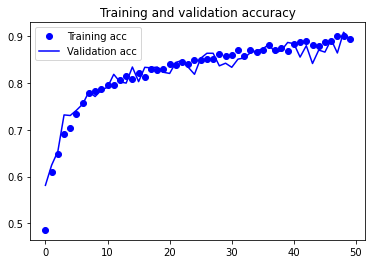

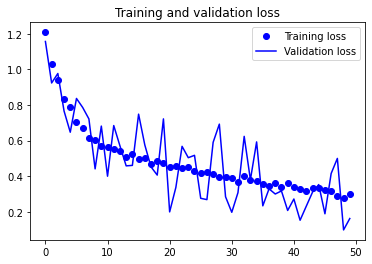

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

`tanh` vs `sigmoid`

In [13]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='tanh'))
model2.add(layers.Dense(4, activation='sigmoid'))

In [14]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

## Compilation

In [15]:
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [16]:
%%time
history2 = model2.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 12s 97ms/step - loss: 1.1673 - acc: 0.5156 - val_loss: 0.8254 - val_acc: 0.6644
Epoch 2/50
128/128 [==============================] - 12s 96ms/step - loss: 0.9337 - acc: 0.6501 - val_loss: 1.0633 - val_acc: 0.6913
Epoch 3/50
128/128 [==============================] - 13s 103ms/step - loss: 0.8501 - acc: 0.6816 - val_loss: 0.8479 - val_acc: 0.7025
Epoch 4/50
128/128 [==============================] - 13s 101ms/step - loss: 0.7687 - acc: 0.7122 - val_loss: 0.5070 - val_acc: 0.7156
Epoch 5/50
128/128 [==============================] - 12s 95ms/step - loss: 0.7340 - acc: 0.7256 - val_loss: 0.5679 - val_acc: 0.7700
Epoch 6/50
128/128 [==============================] - 13s 98ms/step - loss: 0.6764 - acc: 0.7551 - val_loss: 0.4488 - val_acc: 0.7406
Epoch 7/50
128/128 [==============================] - 13s 99ms/step - loss: 0.6410 - acc: 0.7605 - val_loss: 0.5159 - val_acc: 0.7675
Epoch 8/50
128/128 [==============================] - 12s 94

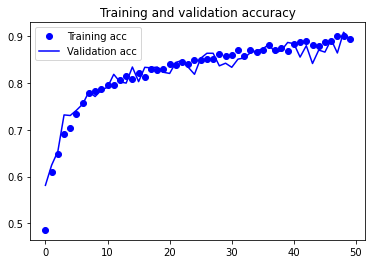

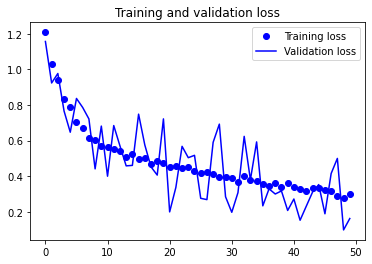

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

`tanh` vs `softmax`

In [18]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='tanh'))
model3.add(layers.Dense(4, activation='softmax'))

In [19]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [20]:
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [21]:
%%time
history3 = model3.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 13s 102ms/step - loss: 1.0925 - acc: 0.5652 - val_loss: 1.0563 - val_acc: 0.6125
Epoch 2/50
128/128 [==============================] - 13s 102ms/step - loss: 0.8840 - acc: 0.6716 - val_loss: 0.6331 - val_acc: 0.7119
Epoch 3/50
128/128 [==============================] - 12s 97ms/step - loss: 0.7911 - acc: 0.7051 - val_loss: 0.7879 - val_acc: 0.7294
Epoch 4/50
128/128 [==============================] - 14s 111ms/step - loss: 0.6935 - acc: 0.7510 - val_loss: 0.7070 - val_acc: 0.7169
Epoch 5/50
128/128 [==============================] - 14s 109ms/step - loss: 0.6753 - acc: 0.7520 - val_loss: 0.9508 - val_acc: 0.7556
Epoch 6/50
128/128 [==============================] - 12s 92ms/step - loss: 0.6398 - acc: 0.7615 - val_loss: 0.6348 - val_acc: 0.7725
Epoch 7/50
128/128 [==============================] - 12s 95ms/step - loss: 0.6261 - acc: 0.7690 - val_loss: 0.5264 - val_acc: 0.7875
Epoch 8/50
128/128 [==============================] - 12s 

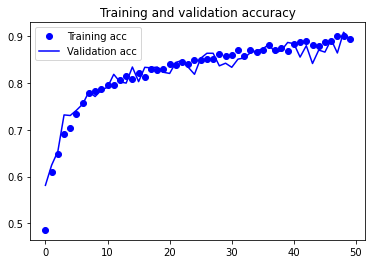

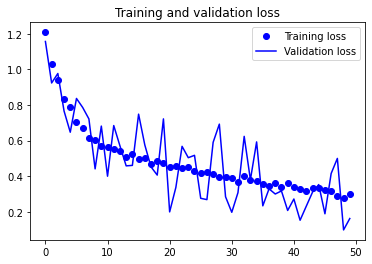

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

`relu` vs `softmax`

In [23]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(4, activation='softmax'))

In [24]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [25]:
model4.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [26]:
%%time
history4 = model4.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 12s 91ms/step - loss: 1.1543 - acc: 0.5286 - val_loss: 1.1068 - val_acc: 0.6281
Epoch 2/50
128/128 [==============================] - 12s 90ms/step - loss: 0.9857 - acc: 0.6277 - val_loss: 0.9504 - val_acc: 0.6637
Epoch 3/50
128/128 [==============================] - 11s 85ms/step - loss: 0.8862 - acc: 0.6619 - val_loss: 0.6717 - val_acc: 0.7056
Epoch 4/50
128/128 [==============================] - 11s 89ms/step - loss: 0.8143 - acc: 0.6919 - val_loss: 0.8772 - val_acc: 0.7175
Epoch 5/50
128/128 [==============================] - 11s 86ms/step - loss: 0.7338 - acc: 0.7271 - val_loss: 0.6342 - val_acc: 0.7387
Epoch 6/50
128/128 [==============================] - 11s 85ms/step - loss: 0.6965 - acc: 0.7456 - val_loss: 0.5006 - val_acc: 0.7613
Epoch 7/50
128/128 [==============================] - 11s 84ms/step - loss: 0.6514 - acc: 0.7581 - val_loss: 0.6877 - val_acc: 0.7613
Epoch 8/50
128/128 [==============================] - 11s 85ms

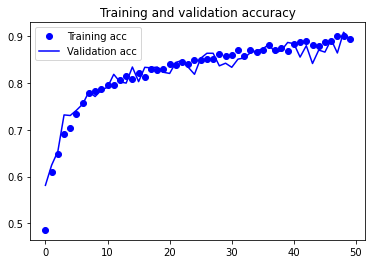

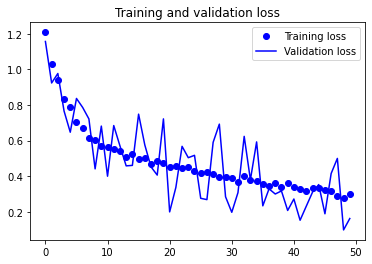

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

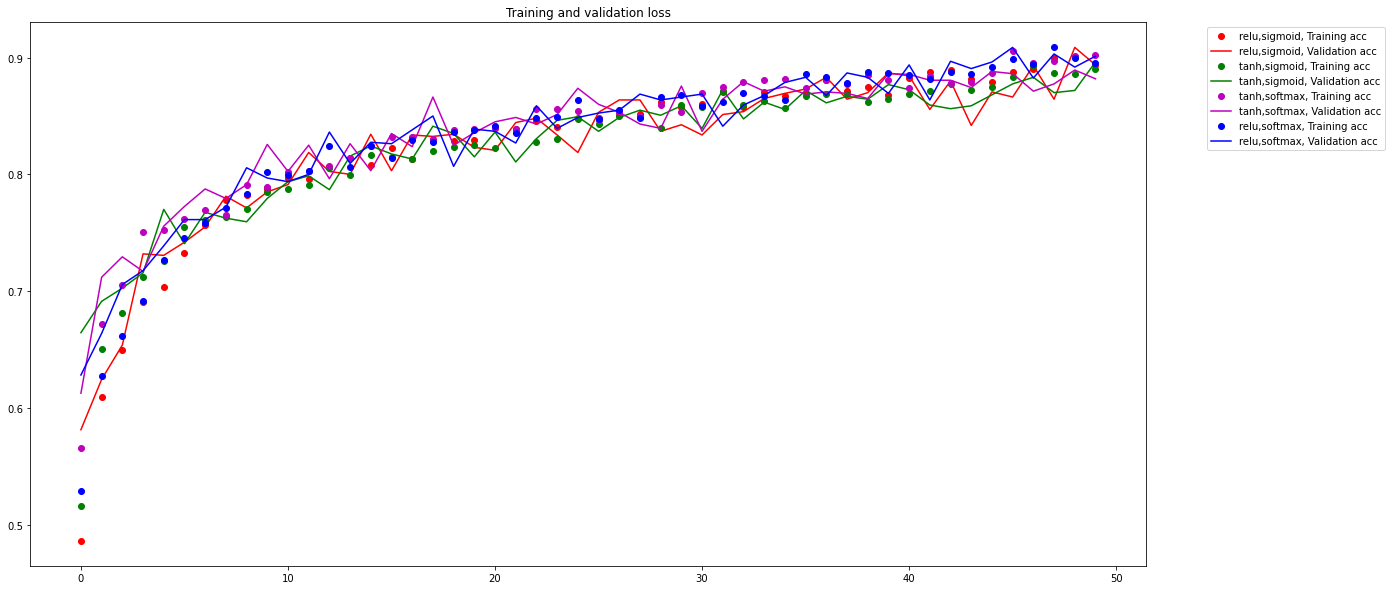

In [28]:
%matplotlib inline

plt.figure(figsize=(20,10))

acc1 = history.history['acc']
val_acc1 = history.history['val_acc']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(len(acc1))

plt.plot(epochs, acc1, "ro", label="relu,sigmoid, Training acc")
plt.plot(epochs, val_acc1, "r", label="relu,sigmoid, Validation acc")

plt.plot(epochs, acc2, "go", label="tanh,sigmoid, Training acc")
plt.plot(epochs, val_acc2, "g", label="tanh,sigmoid, Validation acc")

plt.plot(epochs, acc3, "mo", label="tanh,softmax, Training acc")
plt.plot(epochs, val_acc3, "m", label="tanh,softmax, Validation acc")

plt.plot(epochs, acc4, "bo", label="relu,softmax, Training acc")
plt.plot(epochs, val_acc4, "b", label="relu,softmax, Validation acc")

plt.title('Training and validation loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

** **

## Batch_size = 64

In [29]:
train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=64, class_mode='categorical')

Found 62208 images belonging to 4 classes.


In [30]:
val_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=64, class_mode='categorical')

Found 3968 images belonging to 4 classes.


In [31]:
# test_gen = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='categorical')

In [32]:
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 150, 150, 3)
labels batch shape: (64, 4)


## Building the network

`relu`, `sigmoid`

In [33]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(4, activation='sigmoid'))

In [34]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [35]:
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [36]:
%%time
history = model1.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 24s 191ms/step - loss: 1.1708 - acc: 0.5143 - val_loss: 0.9655 - val_acc: 0.6187
Epoch 2/50
128/128 [==============================] - 23s 178ms/step - loss: 0.9773 - acc: 0.6350 - val_loss: 1.1598 - val_acc: 0.6031
Epoch 3/50
128/128 [==============================] - 23s 183ms/step - loss: 0.8678 - acc: 0.6764 - val_loss: 0.8249 - val_acc: 0.7041
Epoch 4/50
128/128 [==============================] - 23s 179ms/step - loss: 0.7592 - acc: 0.7153 - val_loss: 0.6629 - val_acc: 0.7575
Epoch 5/50
128/128 [==============================] - 22s 172ms/step - loss: 0.6893 - acc: 0.7444 - val_loss: 0.5357 - val_acc: 0.7525
Epoch 6/50
128/128 [==============================] - 22s 169ms/step - loss: 0.6330 - acc: 0.7628 - val_loss: 0.6024 - val_acc: 0.7462
Epoch 7/50
128/128 [==============================] - 24s 188ms/step - loss: 0.6166 - acc: 0.7784 - val_loss: 0.5576 - val_acc: 0.7481
Epoch 8/50
128/128 [==============================] - 2

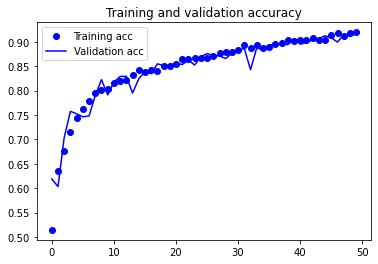

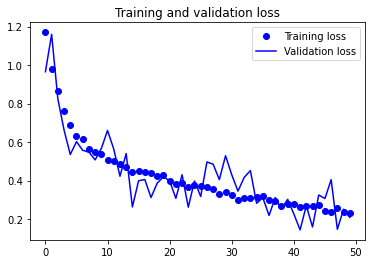

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

`tanh` vs `sigmoid`

In [38]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='tanh'))
model2.add(layers.Dense(4, activation='sigmoid'))

In [39]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [40]:
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [41]:
%%time
history2 = model2.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 22s 174ms/step - loss: 1.1263 - acc: 0.5486 - val_loss: 0.7536 - val_acc: 0.6281
Epoch 2/50
128/128 [==============================] - 21s 166ms/step - loss: 0.8998 - acc: 0.6554 - val_loss: 0.7687 - val_acc: 0.7072
Epoch 3/50
128/128 [==============================] - 21s 165ms/step - loss: 0.7745 - acc: 0.7087 - val_loss: 0.9533 - val_acc: 0.7291
Epoch 4/50
128/128 [==============================] - 21s 166ms/step - loss: 0.7272 - acc: 0.7299 - val_loss: 0.4874 - val_acc: 0.7519
Epoch 5/50
128/128 [==============================] - 21s 167ms/step - loss: 0.6789 - acc: 0.7480 - val_loss: 0.7698 - val_acc: 0.7606
Epoch 6/50
128/128 [==============================] - 21s 166ms/step - loss: 0.6171 - acc: 0.7722 - val_loss: 0.4689 - val_acc: 0.7634
Epoch 7/50
128/128 [==============================] - 21s 168ms/step - loss: 0.6000 - acc: 0.7806 - val_loss: 0.5462 - val_acc: 0.7738
Epoch 8/50
128/128 [==============================] - 2

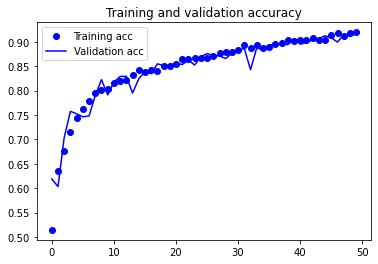

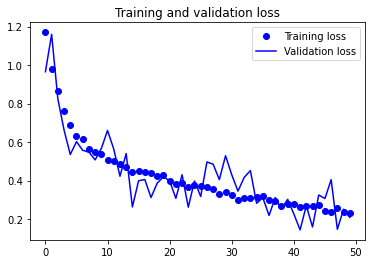

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

`tanh` vs `softmax`

In [43]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='tanh'))
model3.add(layers.Dense(4, activation='softmax'))

In [44]:
model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [45]:
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [46]:
%%time
history3 = model3.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 23s 176ms/step - loss: 1.0795 - acc: 0.5737 - val_loss: 0.7845 - val_acc: 0.6734
Epoch 2/50
128/128 [==============================] - 21s 167ms/step - loss: 0.8553 - acc: 0.6781 - val_loss: 0.6562 - val_acc: 0.7053
Epoch 3/50
128/128 [==============================] - 21s 166ms/step - loss: 0.7514 - acc: 0.7164 - val_loss: 0.9435 - val_acc: 0.7262
Epoch 4/50
128/128 [==============================] - 21s 167ms/step - loss: 0.6883 - acc: 0.7432 - val_loss: 0.6078 - val_acc: 0.7366
Epoch 5/50
128/128 [==============================] - 21s 166ms/step - loss: 0.6371 - acc: 0.7587 - val_loss: 0.6734 - val_acc: 0.7613
Epoch 6/50
128/128 [==============================] - 21s 165ms/step - loss: 0.5972 - acc: 0.7775 - val_loss: 0.5738 - val_acc: 0.7941
Epoch 7/50
128/128 [==============================] - 22s 171ms/step - loss: 0.5739 - acc: 0.7906 - val_loss: 0.8074 - val_acc: 0.7847
Epoch 8/50
128/128 [==============================] - 2

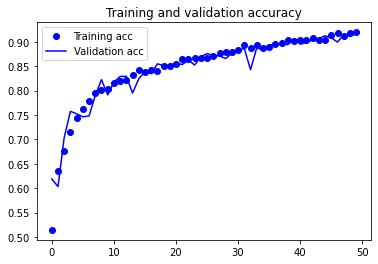

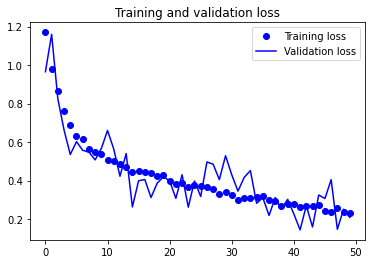

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

`relu` vs `softmax`

In [48]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(4, activation='softmax'))

In [49]:
model4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [50]:
model4.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [51]:
%%time
history4 = model4.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 22s 173ms/step - loss: 1.1383 - acc: 0.5413 - val_loss: 1.2800 - val_acc: 0.5547
Epoch 2/50
128/128 [==============================] - 21s 164ms/step - loss: 0.9349 - acc: 0.6486 - val_loss: 0.9301 - val_acc: 0.6894
Epoch 3/50
128/128 [==============================] - 21s 164ms/step - loss: 0.7939 - acc: 0.6979 - val_loss: 0.7070 - val_acc: 0.7188
Epoch 4/50
128/128 [==============================] - 21s 164ms/step - loss: 0.7116 - acc: 0.7329 - val_loss: 1.0141 - val_acc: 0.7016
Epoch 5/50
128/128 [==============================] - 21s 163ms/step - loss: 0.6524 - acc: 0.7592 - val_loss: 0.6056 - val_acc: 0.7609
Epoch 6/50
128/128 [==============================] - 21s 162ms/step - loss: 0.6131 - acc: 0.7734 - val_loss: 0.7216 - val_acc: 0.7784
Epoch 7/50
128/128 [==============================] - 21s 165ms/step - loss: 0.5793 - acc: 0.7883 - val_loss: 0.5261 - val_acc: 0.8031
Epoch 8/50
128/128 [==============================] - 2

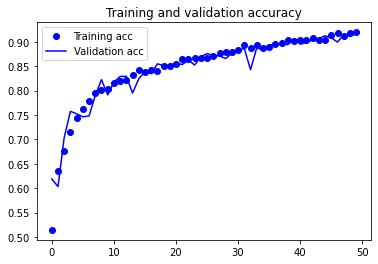

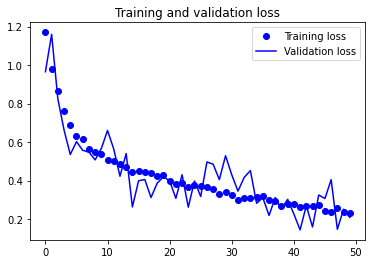

In [52]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

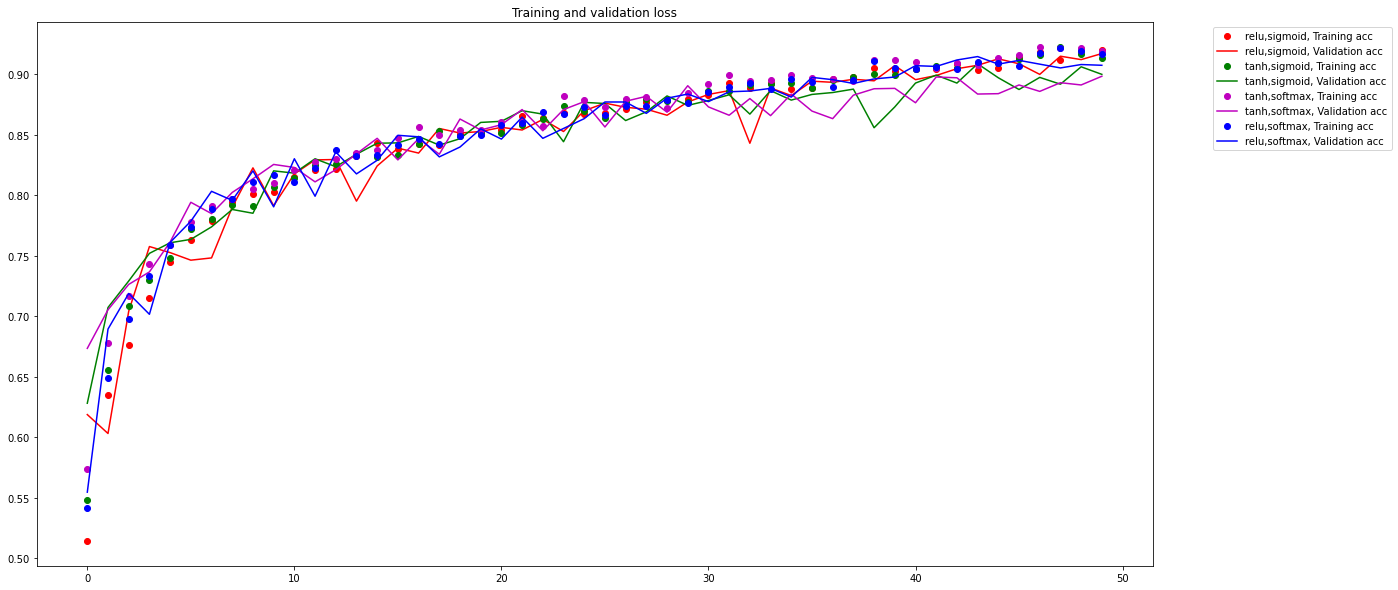

In [53]:
%matplotlib inline

plt.figure(figsize=(20,10))

acc1 = history.history['acc']
val_acc1 = history.history['val_acc']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(len(acc1))

plt.plot(epochs, acc1, "ro", label="relu,sigmoid, Training acc")
plt.plot(epochs, val_acc1, "r", label="relu,sigmoid, Validation acc")

plt.plot(epochs, acc2, "go", label="tanh,sigmoid, Training acc")
plt.plot(epochs, val_acc2, "g", label="tanh,sigmoid, Validation acc")

plt.plot(epochs, acc3, "mo", label="tanh,softmax, Training acc")
plt.plot(epochs, val_acc3, "m", label="tanh,softmax, Validation acc")

plt.plot(epochs, acc4, "bo", label="relu,softmax, Training acc")
plt.plot(epochs, val_acc4, "b", label="relu,softmax, Validation acc")

plt.title('Training and validation loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

** **

## Batch_size = 128

In [55]:
train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=128, class_mode='categorical')

Found 62208 images belonging to 4 classes.


In [56]:
val_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=128, class_mode='categorical')

Found 3968 images belonging to 4 classes.


In [57]:
# test_gen = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='categorical')

In [58]:
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (128, 150, 150, 3)
labels batch shape: (128, 4)


## Building the network

`relu`, `sigmoid`

In [59]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(4, activation='sigmoid'))

In [60]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [61]:
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [62]:
%%time
history = model1.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 44s 340ms/step - loss: 1.1327 - acc: 0.5438 - val_loss: 0.9074 - val_acc: 0.6458
Epoch 2/50
128/128 [==============================] - 41s 319ms/step - loss: 0.9428 - acc: 0.6431 - val_loss: 0.8192 - val_acc: 0.7044
Epoch 3/50
128/128 [==============================] - 41s 320ms/step - loss: 0.8033 - acc: 0.6990 - val_loss: 0.6934 - val_acc: 0.7305
Epoch 4/50
128/128 [==============================] - 42s 332ms/step - loss: 0.7072 - acc: 0.7328 - val_loss: 0.6733 - val_acc: 0.7567
Epoch 5/50
128/128 [==============================] - 41s 320ms/step - loss: 0.6436 - acc: 0.7637 - val_loss: 0.7427 - val_acc: 0.7600
Epoch 6/50
128/128 [==============================] - 41s 320ms/step - loss: 0.5975 - acc: 0.7781 - val_loss: 0.6238 - val_acc: 0.7944
Epoch 7/50
128/128 [==============================] - 42s 325ms/step - loss: 0.5497 - acc: 0.7985 - val_loss: 0.6068 - val_acc: 0.8064
Epoch 8/50
128/128 [==============================] - 4

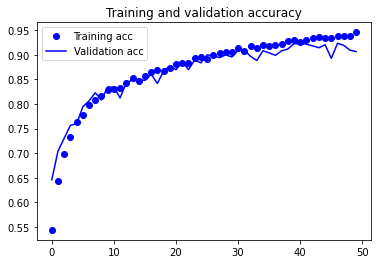

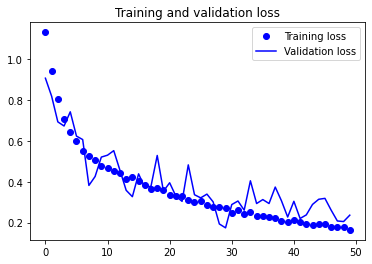

In [63]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

`tanh` vs `sigmoid`

In [64]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='tanh'))
model2.add(layers.Dense(4, activation='sigmoid'))

In [65]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [66]:
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [67]:
%%time
history2 = model2.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 43s 335ms/step - loss: 1.0704 - acc: 0.5750 - val_loss: 1.0342 - val_acc: 0.6219
Epoch 2/50
128/128 [==============================] - 41s 317ms/step - loss: 0.8384 - acc: 0.6780 - val_loss: 0.7978 - val_acc: 0.6991
Epoch 3/50
128/128 [==============================] - 40s 315ms/step - loss: 0.7390 - acc: 0.7199 - val_loss: 0.6137 - val_acc: 0.7322
Epoch 4/50
128/128 [==============================] - 42s 325ms/step - loss: 0.6847 - acc: 0.7452 - val_loss: 0.7238 - val_acc: 0.7411
Epoch 5/50
128/128 [==============================] - 40s 315ms/step - loss: 0.6336 - acc: 0.7603 - val_loss: 0.6362 - val_acc: 0.7620
Epoch 6/50
128/128 [==============================] - 40s 314ms/step - loss: 0.5953 - acc: 0.7802 - val_loss: 0.6310 - val_acc: 0.7912
Epoch 7/50
128/128 [==============================] - 41s 317ms/step - loss: 0.5549 - acc: 0.7946 - val_loss: 0.5795 - val_acc: 0.8100
Epoch 8/50
128/128 [==============================] - 4

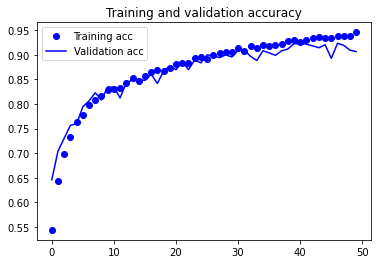

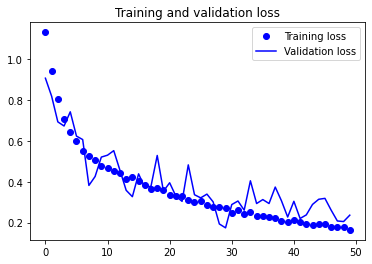

In [68]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

`tanh` vs `softmax`

In [69]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='tanh'))
model3.add(layers.Dense(4, activation='softmax'))

In [70]:
model3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [71]:
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [72]:
%%time
history3 = model3.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 44s 340ms/step - loss: 1.0367 - acc: 0.5895 - val_loss: 0.9692 - val_acc: 0.6509
Epoch 2/50
128/128 [==============================] - 41s 324ms/step - loss: 0.7958 - acc: 0.7030 - val_loss: 0.7506 - val_acc: 0.7309
Epoch 3/50
128/128 [==============================] - 41s 322ms/step - loss: 0.7200 - acc: 0.7283 - val_loss: 0.6589 - val_acc: 0.7445
Epoch 4/50
128/128 [==============================] - 42s 331ms/step - loss: 0.6540 - acc: 0.7564 - val_loss: 0.6774 - val_acc: 0.7194
Epoch 5/50
128/128 [==============================] - 42s 326ms/step - loss: 0.6071 - acc: 0.7747 - val_loss: 0.5528 - val_acc: 0.7941
Epoch 6/50
128/128 [==============================] - 41s 317ms/step - loss: 0.5636 - acc: 0.7915 - val_loss: 0.5930 - val_acc: 0.7980
Epoch 7/50
128/128 [==============================] - 41s 321ms/step - loss: 0.5395 - acc: 0.8030 - val_loss: 0.5636 - val_acc: 0.7891
Epoch 8/50
128/128 [==============================] - 4

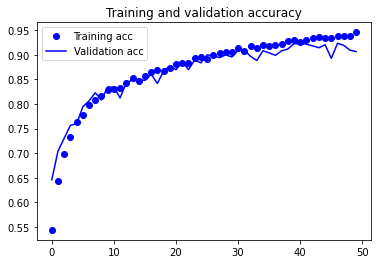

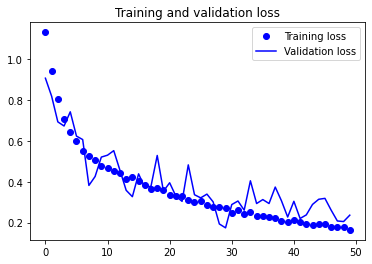

In [73]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

`relu` vs `softmax`

In [74]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(4, activation='softmax'))

In [75]:
model4.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [76]:
model4.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [77]:
%%time
history4 = model4.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 43s 336ms/step - loss: 1.1202 - acc: 0.5530 - val_loss: 0.8792 - val_acc: 0.6439
Epoch 2/50
128/128 [==============================] - 41s 319ms/step - loss: 0.9375 - acc: 0.6431 - val_loss: 0.7417 - val_acc: 0.6778
Epoch 3/50
128/128 [==============================] - 41s 318ms/step - loss: 0.8188 - acc: 0.6929 - val_loss: 0.7665 - val_acc: 0.7033
Epoch 4/50
128/128 [==============================] - 42s 332ms/step - loss: 0.7158 - acc: 0.7343 - val_loss: 0.6686 - val_acc: 0.7314
Epoch 5/50
128/128 [==============================] - 40s 316ms/step - loss: 0.6586 - acc: 0.7549 - val_loss: 0.7399 - val_acc: 0.7630
Epoch 6/50
128/128 [==============================] - 40s 314ms/step - loss: 0.5991 - acc: 0.7793 - val_loss: 0.6096 - val_acc: 0.7934
Epoch 7/50
128/128 [==============================] - 41s 322ms/step - loss: 0.5606 - acc: 0.7924 - val_loss: 0.5449 - val_acc: 0.8144
Epoch 8/50
128/128 [==============================] - 4

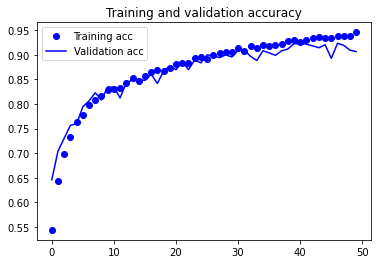

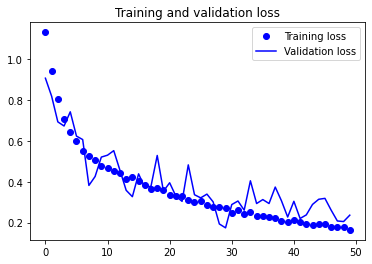

In [78]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

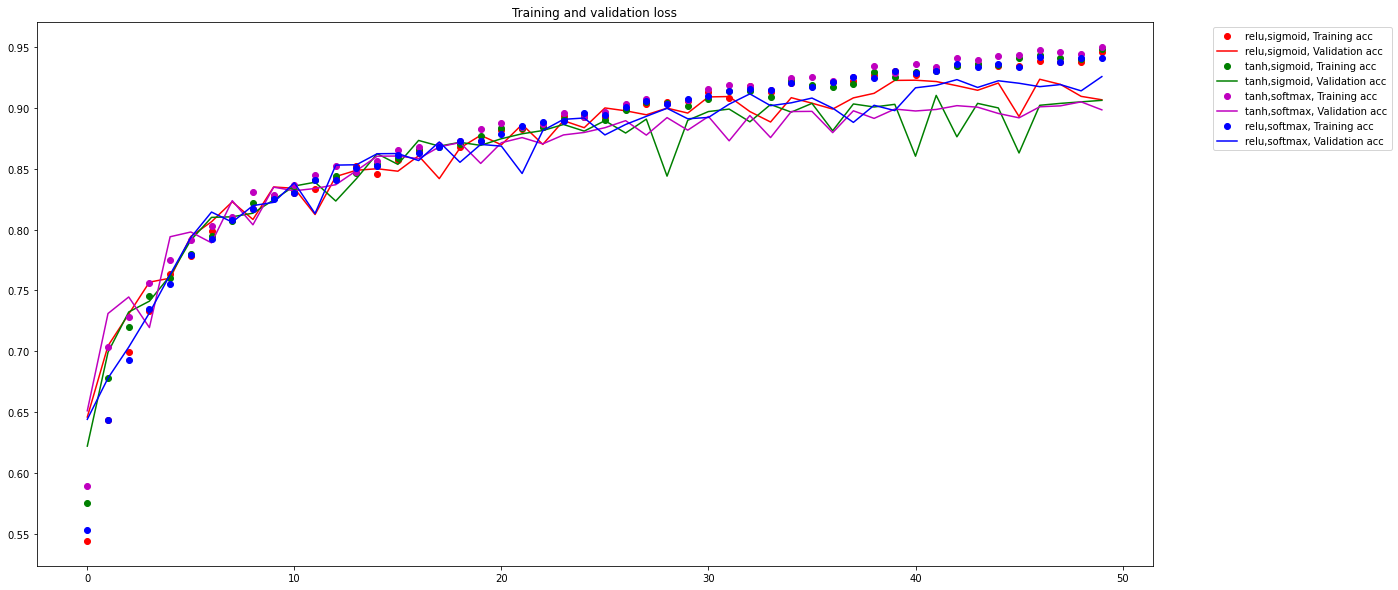

In [79]:
%matplotlib inline

plt.figure(figsize=(20,10))

acc1 = history.history['acc']
val_acc1 = history.history['val_acc']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(len(acc1))

plt.plot(epochs, acc1, "ro", label="relu,sigmoid, Training acc")
plt.plot(epochs, val_acc1, "r", label="relu,sigmoid, Validation acc")

plt.plot(epochs, acc2, "go", label="tanh,sigmoid, Training acc")
plt.plot(epochs, val_acc2, "g", label="tanh,sigmoid, Validation acc")

plt.plot(epochs, acc3, "mo", label="tanh,softmax, Training acc")
plt.plot(epochs, val_acc3, "m", label="tanh,softmax, Validation acc")

plt.plot(epochs, acc4, "bo", label="relu,softmax, Training acc")
plt.plot(epochs, val_acc4, "b", label="relu,softmax, Validation acc")

plt.title('Training and validation loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

** **

## Batch_size = 256

In [5]:
train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=256, class_mode='categorical')

Found 62208 images belonging to 4 classes.


In [6]:
val_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=256, class_mode='categorical')

Found 3968 images belonging to 4 classes.


In [7]:
# test_gen = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='categorical')

In [8]:
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (256, 150, 150, 3)
labels batch shape: (256, 4)


## Building the network

`relu`, `sigmoid`

In [9]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(4, activation='sigmoid'))

In [10]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

## Compilation

In [11]:
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [12]:
%%time
history = model1.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 88s 684ms/step - loss: 1.1183 - acc: 0.5484 - val_loss: 0.9138 - val_acc: 0.6358
Epoch 2/50
128/128 [==============================] - 80s 622ms/step - loss: 0.9280 - acc: 0.6471 - val_loss: 0.9041 - val_acc: 0.7012
Epoch 3/50
128/128 [==============================] - 81s 636ms/step - loss: 0.7959 - acc: 0.6996 - val_loss: 0.7315 - val_acc: 0.7401
Epoch 4/50
128/128 [==============================] - 81s 635ms/step - loss: 0.6975 - acc: 0.7387 - val_loss: 0.5680 - val_acc: 0.7632
Epoch 5/50
128/128 [==============================] - 80s 625ms/step - loss: 0.6238 - acc: 0.7705 - val_loss: 0.5509 - val_acc: 0.7973
Epoch 6/50
128/128 [==============================] - 84s 657ms/step - loss: 0.5720 - acc: 0.7899 - val_loss: 0.5383 - val_acc: 0.8039
Epoch 7/50
128/128 [==============================] - 87s 683ms/step - loss: 0.5347 - acc: 0.8051 - val_loss: 0.5416 - val_acc: 0.8132
Epoch 8/50
115/128 [=========================>....] - E

KeyboardInterrupt: 

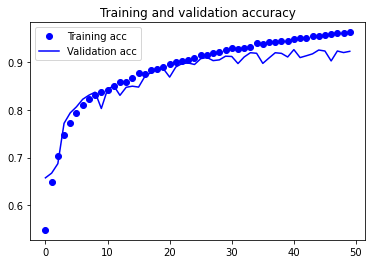

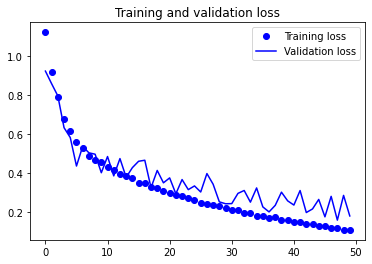

In [88]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

`tanh` vs `sigmoid`

In [13]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='tanh'))
model2.add(layers.Dense(4, activation='sigmoid'))

In [14]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

## Compilation

In [15]:
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [16]:
%%time
history2 = model2.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
127/128 [============================>.] - ETA: 0s - loss: 1.0679 - acc: 0.5731

MemoryError: Unable to allocate 65.9 MiB for an array with shape (256, 150, 150, 3) and data type float32

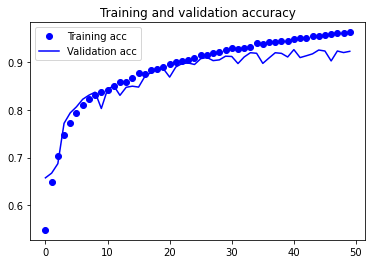

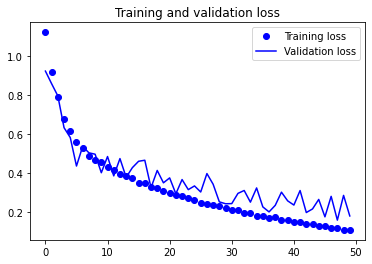

In [93]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

`tanh` vs `softmax`

In [17]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='tanh'))
model3.add(layers.Dense(4, activation='softmax'))

In [18]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [19]:
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [20]:
%%time
history3 = model3.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
  9/128 [=>............................] - ETA: 1:09 - loss: 1.3156 - acc: 0.4310

MemoryError: Unable to allocate 65.9 MiB for an array with shape (256, 150, 150, 3) and data type float32

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: name 'history' is not defined

`relu` vs `softmax`

In [21]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(4, activation='softmax'))

In [22]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [23]:
model4.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [24]:
%%time
history4 = model4.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
  8/128 [>.............................] - ETA: 1:12 - loss: 1.2503 - acc: 0.4443

MemoryError: Unable to allocate 65.9 MiB for an array with shape (256, 150, 150, 3) and data type float32

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
%matplotlib inline

plt.figure(figsize=(20,10))

acc1 = history.history['acc']
val_acc1 = history.history['val_acc']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(len(acc1))

plt.plot(epochs, acc1, "ro", label="relu,sigmoid, Training acc")
plt.plot(epochs, val_acc1, "r", label="relu,sigmoid, Validation acc")

plt.plot(epochs, acc2, "go", label="tanh,sigmoid, Training acc")
plt.plot(epochs, val_acc2, "g", label="tanh,sigmoid, Validation acc")

plt.plot(epochs, acc3, "mo", label="tanh,softmax, Training acc")
plt.plot(epochs, val_acc3, "m", label="tanh,softmax, Validation acc")

plt.plot(epochs, acc4, "bo", label="relu,softmax, Training acc")
plt.plot(epochs, val_acc4, "b", label="relu,softmax, Validation acc")

plt.title('Training and validation loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

NameError: name 'history' is not defined

<Figure size 1440x720 with 0 Axes>